In [91]:
import pandas as pd
import numpy as np
import pickle
from StringContains import ContainedStringCase 
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')

In [92]:
file_name = "stringcontains_data_all.csv"
results_dir = "stringcontains_results_vm_gc/"
df = pd.read_csv(results_dir+file_name)

In [93]:
df.head()

,Unnamed: 0,Iteration,Iteration Type,Measurement Unit,Method,Score,str_len,regex_len,regex_index,string_index,str_pos,match_type
0,0,1,warmup,ns/op,regexMatches,205.610,5,6,0,0,0,M
1,1,2,warmup,ns/op,regexMatches,147.342,5,6,0,0,0,M
2,2,3,warmup,ns/op,regexMatches,120.301,5,6,0,0,0,M
3,3,4,warmup,ns/op,regexMatches,120.447,5,6,0,0,0,M
4,4,5,warmup,ns/op,regexMatches,120.748,5,6,0,0,0,M


In [94]:
df["string_index"].value_counts()

5    2160
4    2160
3    2160
2    2160
1    2160
0    2160
Name: string_index, dtype: int64

In [95]:
filter_regex = df["Method"] == "regexMatches"
filter_measure = df["Iteration Type"] == "measured"

In [96]:
df_regex = df.loc[filter_regex & filter_measure, :]
df_regex.loc[:, "Score_log10"] = np.log10(df_regex.loc[:,'Score'])
print(df_regex["Score"].describe())
print(df_regex.loc[:, "Score_log10"].describe())

count      5400.000000
mean      87182.330690
std      184221.261629
min          62.658000
25%         692.387500
50%        6976.706500
75%       44927.821500
max      740436.388000
Name: Score, dtype: float64
count    5400.000000
mean        3.746807
std         1.209584
min         1.796977
25%         2.840274
50%         3.843650
75%         4.652505
max         5.869488
Name: Score_log10, dtype: float64


/Users/pw/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/pw/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [97]:
df_string = df.loc[~filter_regex & filter_measure, :]
df_string.loc[:, "Score_log10"] = np.log10(df_string.loc[:,'Score'])
print(df_string["Score"].describe())
print(df_string.loc[:, "Score_log10"].describe())

count     5400.000000
mean      2413.112823
std       5030.687844
min          4.934000
25%          4.937000
50%         24.946500
75%       1316.421750
max      19005.533000
Name: Score, dtype: float64
count    5400.000000
mean        1.993646
std         1.294191
min         0.693199
25%         0.693463
50%         1.397010
75%         3.117603
max         4.278880
Name: Score_log10, dtype: float64


(0.0, 6.0)

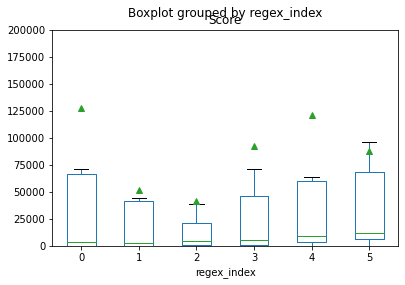

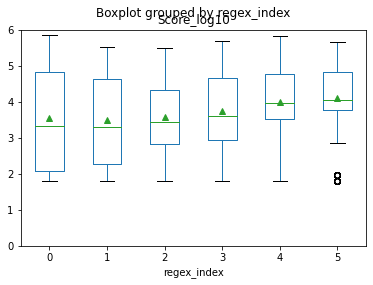

In [194]:
ax = df_regex.boxplot(by = "regex_index", column = "Score", grid = False, showmeans=True)
ax.set_ylim(0,200000)
ax = df_regex.boxplot(by = "regex_index", column = "Score_log10", grid = False, showmeans=True)
ax.set_ylim(0,6)

(0.0, 6.0)

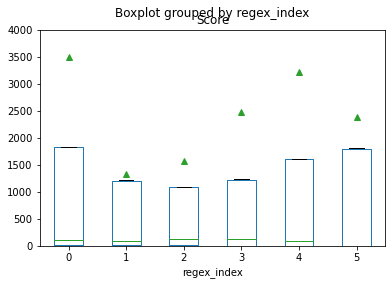

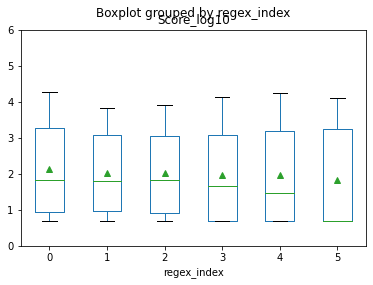

In [195]:
ax = df_string.boxplot(by = "regex_index", column = "Score", grid = False, showmeans = True)
ax.set_ylim(0,4000)
ax = df_string.boxplot(by = "regex_index", column = "Score_log10", grid = False, showmeans=True)
ax.set_ylim(0,6)

(0.0, 6.0)

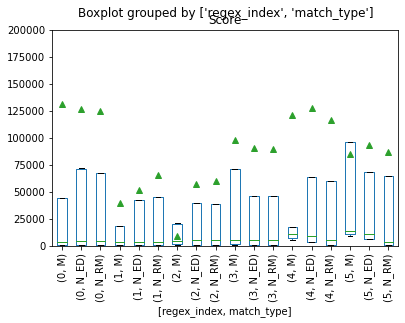

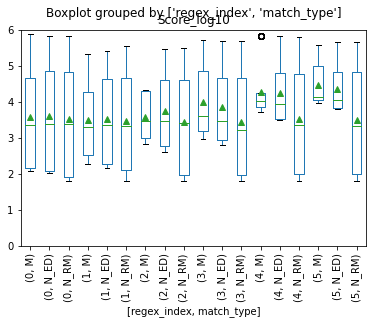

In [61]:
ax = df_regex.boxplot(by = ["regex_index","match_type"], column = "Score", grid = False, rot = 90, fontsize=10, showmeans = True)
ax.set_ylim(0, 200000)
ax = df_regex.boxplot(by = ["regex_index","match_type"], column = "Score_log10", grid = False, rot = 90, fontsize=10, showmeans = True)
ax.set_ylim(0, 6)

(0.0, 6.0)

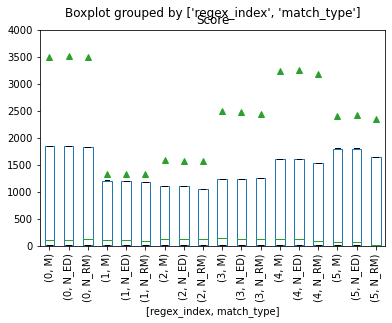

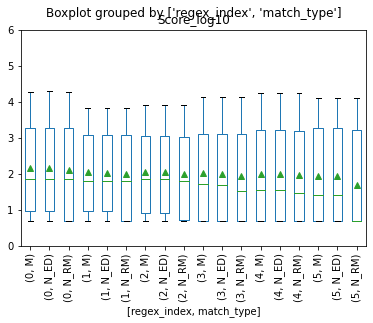

In [199]:
ax = df_string.boxplot(by = ["regex_index","match_type"], column = "Score", grid = False, rot = 90, fontsize=10, showmeans = True)
ax.set_ylim(0,4000)
ax = df_string.boxplot(by = ["regex_index","match_type"], column = "Score_log10", grid = False, rot = 90, fontsize=10, showmeans = True)
ax.set_ylim(0,6)

(0.0, 6.0)

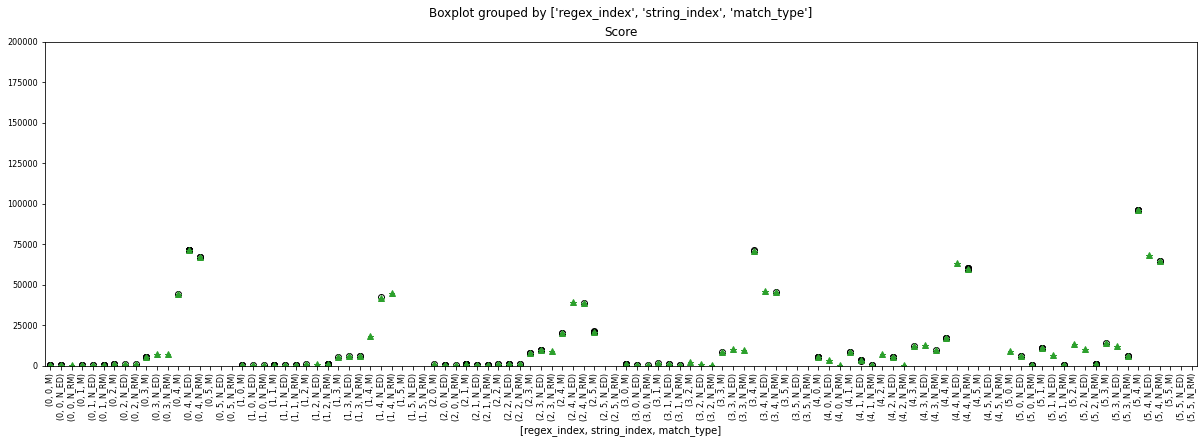

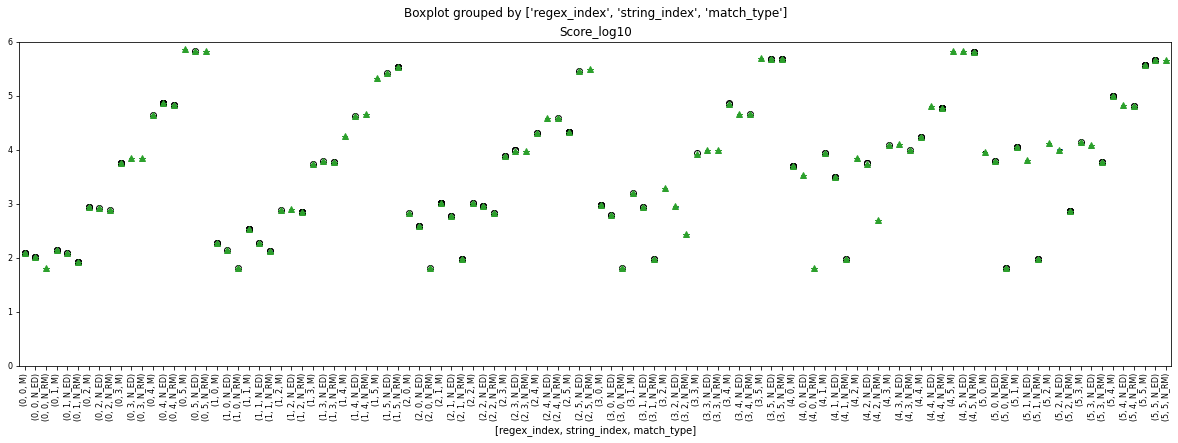

In [201]:
ax = df_regex.boxplot(by = ["regex_index","string_index","match_type"], column = "Score", grid = False, rot = 90, fontsize = 8, figsize = (20,6), showmeans = True)
ax.set_ylim(0, 200000)
ax = df_regex.boxplot(by = ["regex_index","string_index","match_type"], column = "Score_log10", grid = False, rot = 90, fontsize = 8, figsize = (20,6), showmeans = True)
ax.set_ylim(0, 6)

(0.0, 6.0)

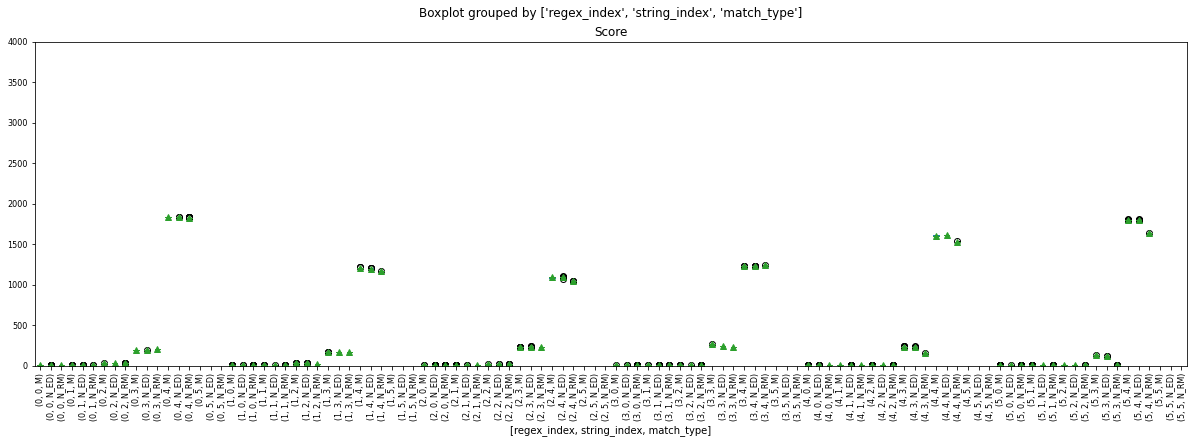

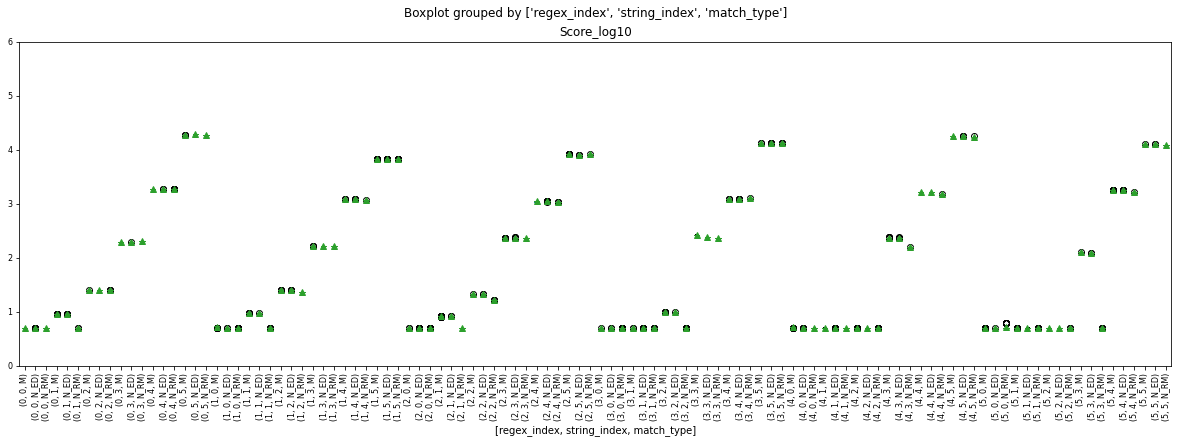

In [202]:
ax = df_string.boxplot(by = ["regex_index","string_index","match_type"], column = "Score", grid = False, rot = 90, fontsize = 8, figsize = (20,6), showmeans = True)
ax.set_ylim(0,4000)
ax = df_string.boxplot(by = ["regex_index","string_index","match_type"], column = "Score_log10", grid = False, rot = 90, fontsize = 8, figsize = (20,6), showmeans = True)
ax.set_ylim(0,6)

In [9]:
df_measured = df.loc[filter_measure, :]
df_measured.loc[:, "Score_log10"] = np.log10(df_measured['Score'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        12960 non-null  int64  
 1   Iteration         12960 non-null  int64  
 2   Iteration Type    12960 non-null  object 
 3   Measurement Unit  12960 non-null  object 
 4   Method            12960 non-null  object 
 5   Score             12960 non-null  float64
 6   str_len           12960 non-null  int64  
 7   regex_len         12960 non-null  int64  
 8   regex_index       12960 non-null  int64  
 9   string_index      12960 non-null  int64  
 10  str_pos           12960 non-null  int64  
 11  match_type        12960 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 1.2+ MB


(0.0, 6.0)

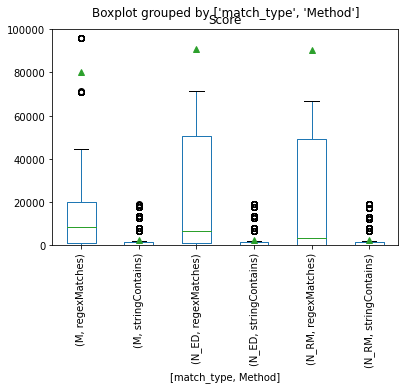

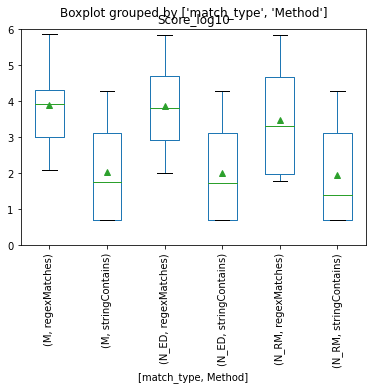

In [38]:
ax = df_measured.boxplot(by=["match_type","Method"], column = "Score", grid = False, rot = 90, fontsize = 10, showmeans = True)
ax.set_ylim(0, 100000)
ax = df_measured.boxplot(by=["match_type","Method"], column = "Score_log10", grid = False, rot = 90, fontsize = 10, showmeans = True)
ax.set_ylim(0, 6)

(0.0, 6.0)

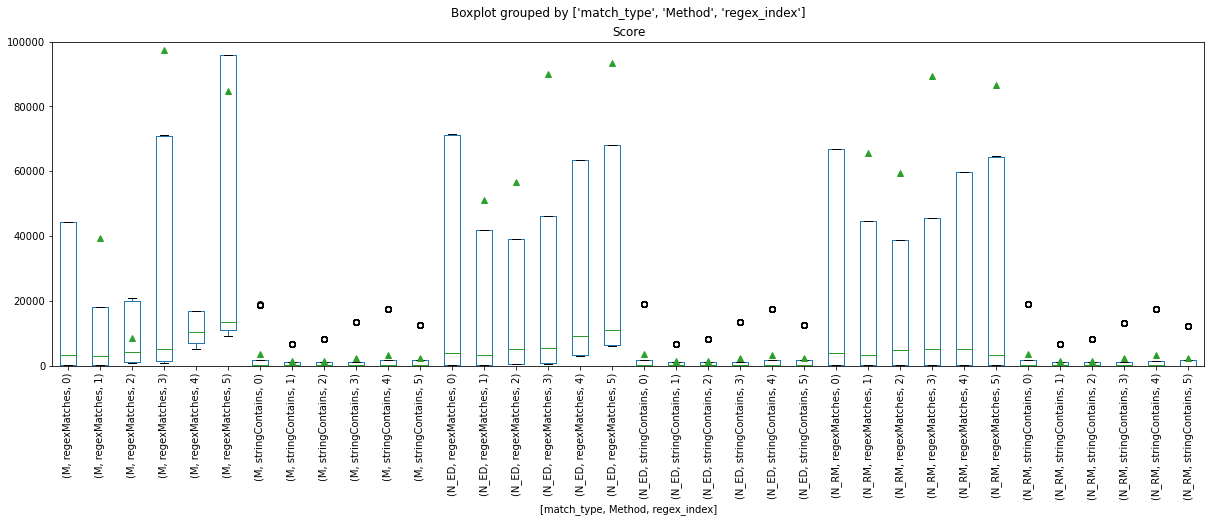

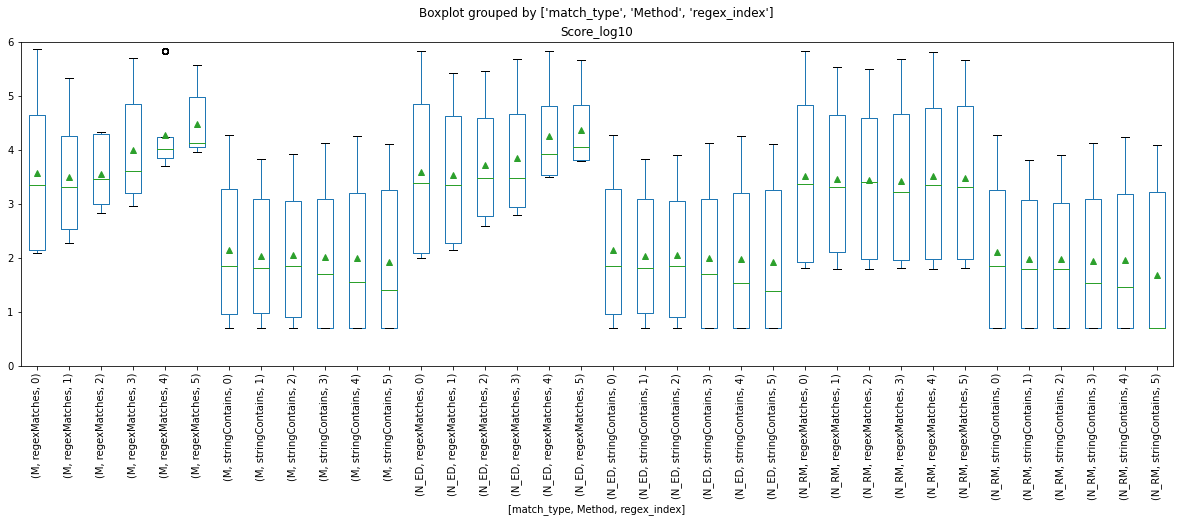

In [39]:
ax = df_measured.boxplot(by=["match_type","Method","regex_index"], column = "Score", grid = False, rot = 90, fontsize = 10, showmeans = True, figsize = (20,6))
ax.set_ylim(0, 100000)
ax = df_measured.boxplot(by=["match_type","Method","regex_index"], column = "Score_log10", grid = False, rot = 90, fontsize = 10, showmeans = True, figsize = (20,6))
ax.set_ylim(0, 6)

M            AxesSubplot(0.1,0.559091;0.363636x0.340909)
N_ED    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
N_RM             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

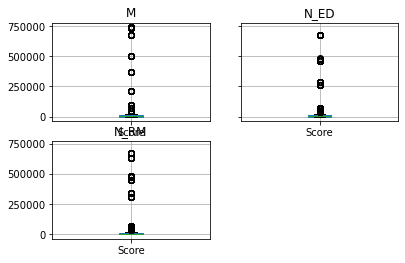

In [53]:
df_measured.groupby("match_type", as_index = False).boxplot(column = "Score")

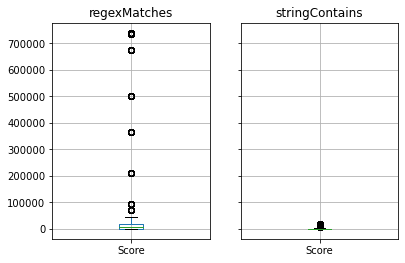

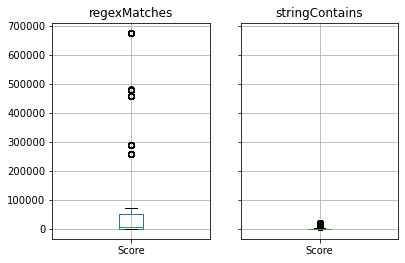

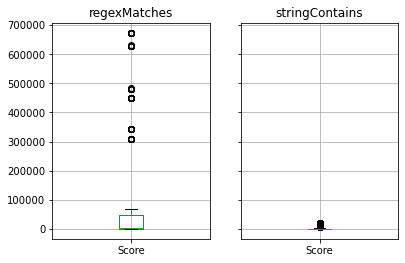

In [55]:
# df_measured.loc[(df_measured['match_type'] == 'M') & (df_measured['regex_index'] == 0), :]
for name, g in df_measured.groupby("match_type"):
    g.groupby("Method").boxplot(subplots = True, column = "Score")

In [78]:
plt.style.use('seaborn-paper')
df_measured.dtypes
# df_measured.groupby(["match_type","regex_index"]).boxplot(subplots = False, column = "Score")

Unnamed: 0            int64
Iteration             int64
Iteration Type       object
Measurement Unit     object
Method               object
Score               float64
str_len               int64
regex_len             int64
regex_index           int64
string_index          int64
str_pos               int64
match_type           object
Score_log10         float64
dtype: object

(0.0, 40000.0)

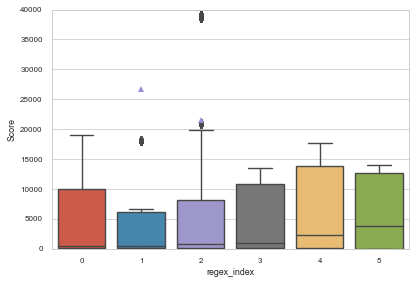

In [73]:
sns.set_style("whitegrid") 
ax = sns.boxplot(x = 'regex_index', y = 'Score', data = df_measured, showmeans = True)
ax.set_ylim(0,40000)

(0.0, 200000.0)

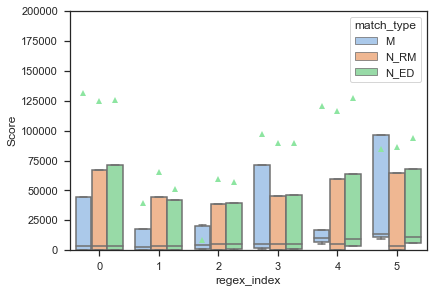

In [89]:
sns.set(style="ticks", palette="pastel")
ax = sns.boxplot(x="regex_index", y="Score",
            hue="match_type", 
            data=df_regex, showmeans=True)
ax.set_ylim(0,200000)

(0.0, 4000.0)

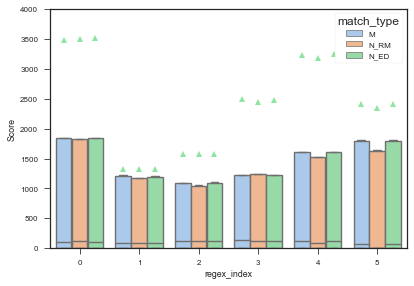

In [100]:
ax = sns.boxplot(x="regex_index", y="Score",
            hue="match_type", 
            data=df_string, showmeans=True)
ax.set_ylim(0,4000)

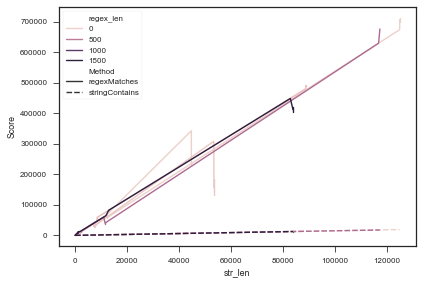

In [111]:
d = sns.lineplot(data=df_measured, x="str_len", y="Score", hue="regex_len", style="Method", err_style="bars")

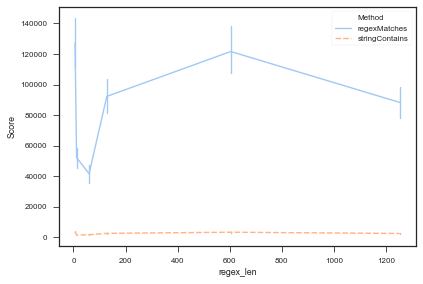

In [112]:
sns.lineplot(data=df_measured, x="regex_len", y="Score", hue="Method", style="Method", err_style="bars")

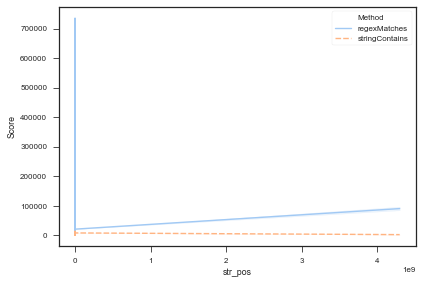

In [107]:
sns.lineplot(data=df_measured, x="str_pos", y="Score", hue="Method", style="Method")